<h1>Predicting Inflation Rates - Modelling</h1>

In this notebook, various types of modelling will be used to predict inflation rates using the data from the last notebook (Data Preprocessing). Each model will be evaluated to see how well it performs.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import BayesianRidge

In [13]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.graphics.tsaplots as sgt

In [5]:
from scipy.stats.distributions import chi2

In [6]:
import time

The dataset is loaded

In [7]:
df = pd.read_csv('../Data/PreprocessedNew')

In [8]:
df.head()

,date,CPI
0,5358,12.7
1,5357,12.7
2,5356,12.7
3,5355,12.7
4,5354,12.7


In [9]:
df.set_index('date', inplace=True)
df.head()

,CPI
date,
5358,12.7
5357,12.7
5356,12.7
5355,12.7
5354,12.7


In [10]:
#df.head()

<h3>Baseline Modelling</h3>

To begin, some simple statistical models will be used to predict inflation. This will be used as a baseline before using learning models.

<h5>Autoregressive Integrated Moving Average (ARIMA)</h5>

ARIMA is a popular model used for time series data. It is a regression of lagged data that has been differenced to make the data stationary (remove the trend and seasonality components of the time series data). The model also uses moving average. It can be represented as ARIMA(p,d,q) where p is the lag, d is the number of times the data is differenced for stationarity, and q is the moving average window size (order of moving average).

<h6>Defining an LLR Test</h6>

In [11]:
# define a fucntion for LLR test
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [12]:
model_ar_1_i_1_ma_1 = ARIMA(df['CPI'], order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                 3771
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -492.580
Date:                Thu, 19 Jan 2023   AIC                            991.160
Time:                        12:41:34   BIC                           1009.865
Sample:                             0   HQIC                           997.811
                               - 3771                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1097      0.024     -4.533      0.000      -0.157      -0.062
ma.L1         -0.0017      0.024     -0.070      0.944      -0.050       0.046
sigma2         0.0760      0.000    403.434      0.000       0.076       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           5315517.82
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.20   Skew:                             1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                       186.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

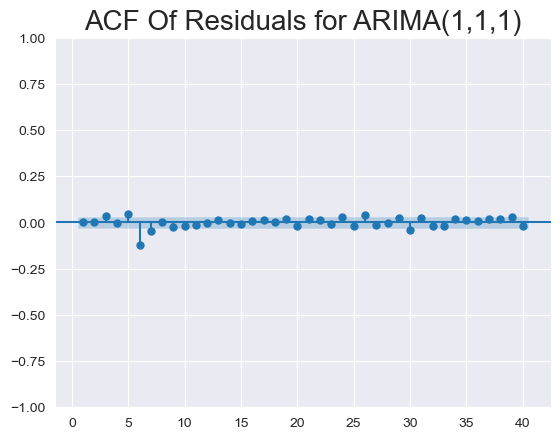

In [14]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

In [ ]:
# Since 3rd Lag is significant
# We need to take ARIMA(2,1,2) and its nested components => (1,1,2), (2,1,1), (2,1,2)
# IFF (3,1,3) => p=1,2,3 q=1,2,3 - (1,1,3), (2,1,3), (3,1,3), (3,1,1), (3,1,2)

In [15]:
model_ar_1_i_1_ma_2 = ARIMA(df['CPI'], order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_2_i_1_ma_1 = ARIMA(df['CPI'], order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_2_i_1_ma_2 = ARIMA(df['CPI'], order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()

C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [16]:
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(2,1,2):  \t LL = ", results_ar_2_i_1_ma_2.llf, "\t AIC = ", results_ar_2_i_1_ma_2.aic)

ARIMA(1,1,2):  	 LL =  -478.81435570449514 	 AIC =  965.6287114089903
ARIMA(2,1,1):  	 LL =  -491.6275685063985 	 AIC =  991.255137012797
ARIMA(2,1,2):  	 LL =  -448.8973222249624 	 AIC =  907.7946444499248


In [17]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_2_i_1_ma_2, DF=2)))


LLR test p-value = 0.0


C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
# Check with LLR test
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_2_i_1_ma_1, DF=1)))

C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



LLR test p-value = 0.167


In [19]:
# Check with LLR test
print("\nLLR test p-value = " + str(LLR_test(model_ar_2_i_1_ma_1, model_ar_2_i_1_ma_2, DF=1)))

C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



LLR test p-value = 0.0


C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Below is a line chart of CPI over the years from 2008 to 2022 with 0 being 01-01-2008. Each day is counted as one.

<AxesSubplot:xlabel='date'>

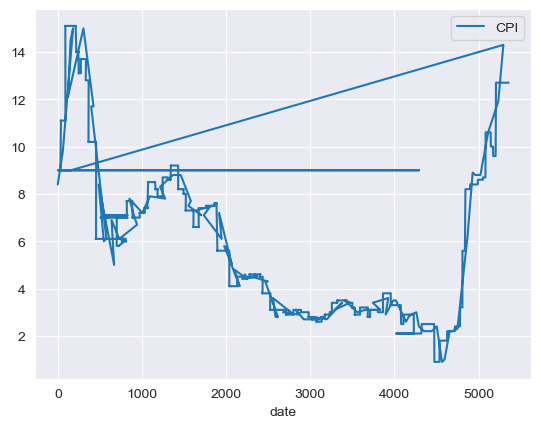

In [10]:
df.plot()

We already saw in the EDA notebook that the data is not stationary and the plan is to use differencing to detrend and deseasonalize the data. One level of differencing was enough to get the data to be stationary according to the augmented dickey fuller test.

Based on this, the d value in ARIMA(p,d,q) will be set to 1 for one level of differencing.

In [11]:
model = ARIMA(df, order=(10,1,0))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ituser\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                 3771
Model:                ARIMA(10, 1, 0)   Log Likelihood                -363.129
Date:                Fri, 13 Jan 2023   AIC                            748.257
Time:                        14:12:25   BIC                            816.840
Sample:                             0   HQIC                           772.641
                               - 3771                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1072      0.004    -26.890      0.000      -0.115      -0.099
ar.L2          0.0234      0.004      5.438      0.000       0.015       0.032
ar.L3          0.0684      0.004     19.138      0.0

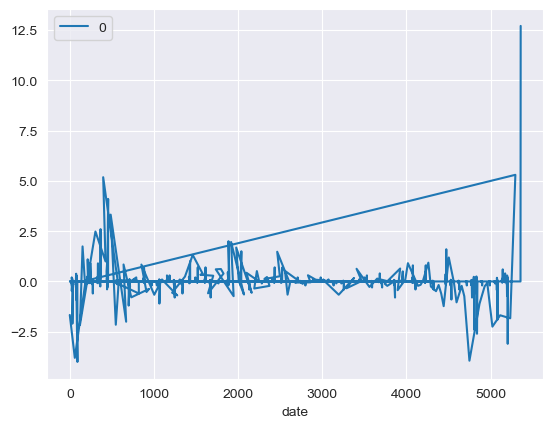

In [12]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

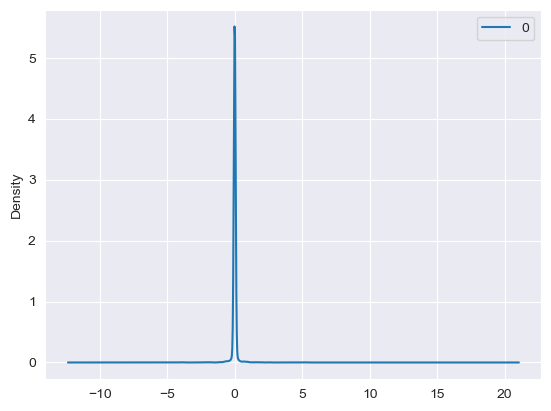

In [13]:
residuals.plot(kind='kde')
plt.show()

In [14]:
print(residuals.describe())

                 0
count  3771.000000
mean      0.001808
std       0.337280
min      -4.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      12.700000


<h5>Forcasting using ARIMA</h5>

In [15]:
df.sort_values(by='date', inplace=True)
df.reset_index(inplace=True)
split_point = len(df) - 365
dataset, validation = df[0: split_point], df[split_point:]

In [16]:
validation

,date,CPI
3406,4831,5.6
3407,4832,5.6
3408,4833,5.6
3409,4836,5.6
3410,4837,5.6
...,...,...
3766,5354,12.7
3767,5355,12.7
3768,5356,12.7
3769,5357,12.7


In [17]:
X = dataset['date']
y = dataset['CPI']

In [18]:
dataset

,date,CPI
0,0,8.4
1,2,9.0
2,3,9.0
3,6,9.0
4,7,9.0
...,...,...
3401,4824,5.6
3402,4825,5.6
3403,4826,5.6
3404,4829,5.6


In [19]:
tscv = TimeSeriesSplit()

In [33]:
# Split data into train and test

for train_index, test_index in tscv.split(y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [ ]:
predictions = list()
for t in range(len(X_test)):
    model = ARIMA(X_train.values, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = X_test.values[t]
    print(obs)
    history = [X_train.values]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


4024
predicted=4023.657420, expected=4024.000000
4025
predicted=4023.657420, expected=4025.000000
4026
predicted=4023.657420, expected=4026.000000
4027
predicted=4023.657420, expected=4027.000000
4028
predicted=4023.657420, expected=4028.000000
4031
predicted=4023.657420, expected=4031.000000
4032
predicted=4023.657420, expected=4032.000000
4033
predicted=4023.657420, expected=4033.000000
4034
predicted=4023.657420, expected=4034.000000
4035
predicted=4023.657420, expected=4035.000000
4038
predicted=4023.657420, expected=4038.000000
4039
predicted=4023.657420, expected=4039.000000
4040
predicted=4023.657420, expected=4040.000000
4041
predicted=4023.657420, expected=4041.000000
4042
predicted=4023.657420, expected=4042.000000
4045
predicted=4023.657420, expected=4045.000000
4046
predicted=4023.657420, expected=4046.000000
4047
predicted=4023.657420, expected=4047.000000
4048
predicted=4023.657420, expected=4048.000000
4049
predicted=4023.657420, expected=4049.000000
4052
predicted=4023.

In [29]:
obs

NameError: name 'obs' is not defined

In [26]:
rmse = np.sqrt(mean_squared_error(X_test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 465.732


In [ ]:
plt.plot(X_test)
plt.plot(predictions, color='red')
plt.show()

<h3>Using the decision tree regressor</h3>

In [12]:
X = df
y = df['CPI']

In [13]:
tscv = TimeSeriesSplit()

In [14]:
# Split data into train and test, run decision tree regression model, and print R2 score, MSE, and MAE.
i=1
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    dt = DecisionTreeRegressor()
    
    dt.fit(X_train, y_train)
    ypred = dt.predict(X_test)
    
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, ypred)))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, ypred)))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, ypred, squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
    print('')
    i=i+1

Fold 1
R2 Score: -0.9820142471552693
Mean Squared Error: 0.4041878980891719
Root Mean Squared Error: 0.6357577353750183
Mean Absolute Error: 0.514171974522293

Fold 2
R2 Score: 0.5485329784455428
Mean Squared Error: 0.032213375796178265
Root Mean Squared Error: 0.17948085077851136
Mean Absolute Error: 0.15015923566879025

Fold 3
R2 Score: -0.9803901525821004
Mean Squared Error: 4.012531847133747
Root Mean Squared Error: 2.0031305117574707
Mean Absolute Error: 1.4664012738853482

Fold 4
R2 Score: -0.21627173332084704
Mean Squared Error: 0.6856528662420378
Root Mean Squared Error: 0.8280415848506872
Mean Absolute Error: 0.6912420382165605

Fold 5
R2 Score: 0.6756106162661579
Mean Squared Error: 4.735079617834376
Root Mean Squared Error: 2.1760238091147754
Mean Absolute Error: 1.3957006369426703



<h3>Decision Tree Regressor with hyperparameter tuning using GridSearchCV</h3>

In [15]:
i=1
for train_index, test_index in tscv.split(y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
   
    
    tree = DecisionTreeRegressor()
    
    grid_search = GridSearchCV(tree, param_grid={'ccp_alpha':[0.001, 0.01, 0, 0.1, 1, 10]})
    grid_search.fit(X_train, y_train)
    ypred = grid_search.predict(X_test)
    
    
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, ypred)))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, ypred)))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, ypred, squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
    print('')
    i=i+1

Fold 1
R2 Score: -1.282241820719963
Mean Squared Error: 0.4654126607676914
Root Mean Squared Error: 0.6822115953043392
Mean Absolute Error: 0.5661254149098406

Fold 2
R2 Score: 0.6253024571478324
Mean Squared Error: 0.0267356687898089
Root Mean Squared Error: 0.1635104546804543
Mean Absolute Error: 0.12277070063694338

Fold 3
R2 Score: -0.9803901525821086
Mean Squared Error: 4.012531847133763
Root Mean Squared Error: 2.0031305117574747
Mean Absolute Error: 1.466401273885353

Fold 4
R2 Score: -0.1495654867874976
Mean Squared Error: 0.6480483343937475
Root Mean Squared Error: 0.8050144932817964
Mean Absolute Error: 0.6299244706489949

Fold 5
R2 Score: 0.6763338742418159
Mean Squared Error: 4.724522292993612
Root Mean Squared Error: 2.173596626100071
Mean Absolute Error: 1.4117834394904418



Fold 2 and fold 5 seem to have better R2 values while Fold 1, 3, and 4 have negative R2 values.

In [16]:
# Split data into train and test, run random forest regression model, and print R2 score, MSE, and MAE.
i=1
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    rf = RandomForestRegressor()
    
    rf.fit(X_train, y_train)
    ypred = rf.predict(X_test)
    
    
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, ypred)))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, ypred)))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, ypred, squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
    print('')
    i=i+1

Fold 1
R2 Score: -0.5509784102331234
Mean Squared Error: 0.316287687898089
Root Mean Squared Error: 0.5623946015904571
Mean Absolute Error: 0.4385222929936302

Fold 2
R2 Score: 0.6865667105064368
Mean Squared Error: 0.02236430095541449
Root Mean Squared Error: 0.1495469857784318
Mean Absolute Error: 0.12102707006369548

Fold 3
R2 Score: 0.5802856746391148
Mean Squared Error: 0.8503966226114573
Root Mean Squared Error: 0.9221695194547787
Mean Absolute Error: 0.7101194267515882

Fold 4
R2 Score: 0.04043663393881858
Mean Squared Error: 0.5409378136942598
Root Mean Squared Error: 0.7354847474246218
Mean Absolute Error: 0.5478614649681484

Fold 5
R2 Score: 0.7263578962760076
Mean Squared Error: 3.99432661146494
Root Mean Squared Error: 1.998581149582108
Mean Absolute Error: 1.299038216560504



The R2 score for the decision tree regressor is not consistent. For some folds, it equates to about 0.90 while other folds have about zero. This could be because the model is unable to predict values at certain parts of the data. The MSE and MAE are both generally low

In [17]:
# Split data into train and test, run GradientBoostingRegressor model, and print R2 score, MSE, and MAE.
i=0
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    gbr = GradientBoostingRegressor()
    
    gbr.fit(X_train, y_train)
    ypred = gbr.predict(X_test)
    
    
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, ypred)))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, ypred)))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, ypred, squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
    print('')
    i=i+1

Fold 0
R2 Score: 0.11458889689097485
Mean Squared Error: 0.18055997994166614
Root Mean Squared Error: 0.424923498928532
Mean Absolute Error: 0.3119122944093811

Fold 1
R2 Score: 0.7968013090549106
Mean Squared Error: 0.014498768415393744
Root Mean Squared Error: 0.12041083180259882
Mean Absolute Error: 0.08189764008152989

Fold 2
R2 Score: 0.7439251591683524
Mean Squared Error: 0.5188414276585804
Root Mean Squared Error: 0.7203064817552182
Mean Absolute Error: 0.5935777640382834

Fold 3
R2 Score: 0.8427449458452029
Mean Squared Error: 0.0886499091102699
Root Mean Squared Error: 0.2977413459872006
Mean Absolute Error: 0.24182127444959703

Fold 4
R2 Score: 0.7810262595901164
Mean Squared Error: 3.1963379415231614
Root Mean Squared Error: 1.7878305125271694
Mean Absolute Error: 1.0932438781047424



The gradient booster has relatively consistent results across the folds. It has low MSE and MAE values across the folds and the R2 score is also generally high with just one significanly low value of 0.299.

In [18]:
# Split data into train and test, run BayesianRidge model, and print R2 score, MSE, and MAE.
i=1
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    br = BayesianRidge()
    
    br.fit(X_train, y_train)
    ypred = br.predict(X_test)
    
    
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, ypred)))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, ypred)))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, ypred, squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, ypred)))
    print('')
    i=i+1

Fold 1
R2 Score: 0.9999999999999984
Mean Squared Error: 3.1533588606085414e-16
Root Mean Squared Error: 1.7757699345941582e-08
Mean Absolute Error: 1.566073783817605e-08

Fold 2
R2 Score: 1.0
Mean Squared Error: 1.5949702389866517e-19
Root Mean Squared Error: 3.993707849839109e-10
Mean Absolute Error: 3.1405752945167563e-10

Fold 3
R2 Score: 1.0
Mean Squared Error: 3.681284718734038e-20
Root Mean Squared Error: 1.9186674330727663e-10
Mean Absolute Error: 1.7787576295119022e-10

Fold 4
R2 Score: 1.0
Mean Squared Error: 8.226614332281202e-22
Root Mean Squared Error: 2.8682075120676333e-11
Mean Absolute Error: 2.5451435721884024e-11

Fold 5
R2 Score: 1.0
Mean Squared Error: 1.1839755115386613e-21
Root Mean Squared Error: 3.440894522560465e-11
Mean Absolute Error: 2.6739752132266204e-11



The Bayesian Ridge, much like the linear regression model performs extremely well on the dataset with R2 scores of 1 and MSE and MAE giving values of zero. 

In [20]:
otherdf = pd.read_csv('../Data/exploredData')

In [21]:
otherdf.head()

,date,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
0,2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,12.7,10.3,6.6
1,2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,12.7,10.3,6.6
2,2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,12.7,10.3,6.6
3,2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,12.7,10.3,6.6
4,2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,12.7,10.3,6.6


In [22]:
frcstdf = otherdf[['date', 'CPI']]

In [23]:
frcstdf.reset_index(inplace=True)
frcstdf.rename(columns={'index': 'unique_id', 'date':'ds', 'CPI':'y' }, inplace=True)

C:\Users\ituser\AppData\Local\Temp\ipykernel_3460\4024293830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frcstdf.rename(columns={'index': 'unique_id', 'date':'ds', 'CPI':'y' }, inplace=True)


In [24]:
frcstdf.head()

,unique_id,ds,y
0,0,2022-09-02,12.7
1,1,2022-09-01,12.7
2,2,2022-08-31,12.7
3,3,2022-08-30,12.7
4,4,2022-08-29,12.7


In [25]:
frcstdf['unique_id'] = 1

C:\Users\ituser\AppData\Local\Temp\ipykernel_3460\2198625539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frcstdf['unique_id'] = 1


In [26]:
frcstdf.head()

,unique_id,ds,y
0,1,2022-09-02,12.7
1,1,2022-09-01,12.7
2,1,2022-08-31,12.7
3,1,2022-08-30,12.7
4,1,2022-08-29,12.7


In [27]:
frcstdf['ds'] = pd.to_datetime(frcstdf['ds'])

C:\Users\ituser\AppData\Local\Temp\ipykernel_3460\74521932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frcstdf['ds'] = pd.to_datetime(frcstdf['ds'])


In [28]:
frcstdf['ds'].head()

0   2022-09-02
1   2022-09-01
2   2022-08-31
3   2022-08-30
4   2022-08-29
Name: ds, dtype: datetime64[ns]

In [29]:
frcstdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  3771 non-null   int64         
 1   ds         3771 non-null   datetime64[ns]
 2   y          3771 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 88.5 KB


In [30]:
tscv2 = TimeSeriesSplit(max_train_size=3000, test_size=500)

In [31]:
# Split data into train and test, run AutoARIMA model, and print R2 score, MSE, and MAE.
#forcasts=[]
i=1
for train_index, test_index in tscv2.split(frcstdf['ds']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = frcstdf.loc[train_index], frcstdf.loc[test_index]
    y_train, y_test = frcstdf['y'].loc[train_index], frcstdf['y'].loc[test_index]
    
    X_train.sort_values(by='ds', inplace=True)
    
    models = [AutoARIMA(), ETS()]
    fcst = StatsForecast(df=X_train, models=models, freq='D')
    
    
    #print(X_train.tail(5))
    forecasts = fcst.forecast(500)
       
    #print(forecasts.head(10))   
    
    print('AUTO ARIMA')
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, forecasts['AutoARIMA'])))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, forecasts['AutoARIMA'])))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, forecasts['AutoARIMA'], squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, forecasts['AutoARIMA'])))
    print('')
    
    print('ETS')
    print('Fold ' + str(i))
    print('R2 Score: ' + str(r2_score(y_test, forecasts['ETS'])))
    print('Mean Squared Error: ' + str(mean_squared_error(y_test, forecasts['ETS'])))
    print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, forecasts['ETS'], squared=False)))
    print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, forecasts['ETS'])))
    print('')
    
    i=i+1

C:\Users\ituser\anaconda3\lib\site-packages\statsforecast\models.py:526: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


AUTO ARIMA
Fold 1
R2 Score: -1987.5466768126776
Mean Squared Error: 171.7928541239923
Root Mean Squared Error: 13.106977306915287
Mean Absolute Error: 12.939298834609982

ETS
Fold 1
R2 Score: -1075.1931698043077
Mean Squared Error: 92.9735763234711
Root Mean Squared Error: 9.642280659857972
Mean Absolute Error: 9.637799809265136



C:\Users\ituser\anaconda3\lib\site-packages\statsforecast\models.py:526: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


AUTO ARIMA
Fold 2
R2 Score: -323.3416772767229
Mean Squared Error: 150.35456536215386
Root Mean Squared Error: 12.261915240375536
Mean Absolute Error: 12.172532559967044

ETS
Fold 2
R2 Score: -165.03066564116605
Mean Squared Error: 76.96657666343694
Root Mean Squared Error: 8.773059709328152
Mean Absolute Error: 8.746599809265138



C:\Users\ituser\anaconda3\lib\site-packages\statsforecast\models.py:526: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


AUTO ARIMA
Fold 3
R2 Score: -63.99808998042381
Mean Squared Error: 77.18491726099774
Root Mean Squared Error: 8.785494707812289
Mean Absolute Error: 8.700354706954958

ETS
Fold 3
R2 Score: -23.23007601685278
Mean Squared Error: 28.773097996444744
Root Mean Squared Error: 5.364056114214759
Mean Absolute Error: 5.252199809265138



C:\Users\ituser\anaconda3\lib\site-packages\statsforecast\models.py:526: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


AUTO ARIMA
Fold 4
R2 Score: -147.49803062206232
Mean Squared Error: 83.14799145298599
Root Mean Squared Error: 9.118552048049404
Mean Absolute Error: 8.731817150878905

ETS
Fold 4
R2 Score: -50.52382478702004
Mean Squared Error: 28.849557971038855
Root Mean Squared Error: 5.371178452727004
Mean Absolute Error: 5.318799809265136



C:\Users\ituser\anaconda3\lib\site-packages\statsforecast\models.py:526: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


AUTO ARIMA
Fold 5
R2 Score: -0.29079228107420385
Mean Squared Error: 19.519581599884177
Root Mean Squared Error: 4.418097056412883
Mean Absolute Error: 3.9002001693725585

ETS
Fold 5
R2 Score: -0.29079228107420385
Mean Squared Error: 19.519581599884177
Root Mean Squared Error: 4.418097056412883
Mean Absolute Error: 3.9002001693725585



In [32]:
forecasts.tail()

,ds,AutoARIMA,ETS
unique_id,,,
1,2022-12-11,8.4,8.4
1,2022-12-12,8.4,8.4
1,2022-12-13,8.4,8.4
1,2022-12-14,8.4,8.4
1,2022-12-15,8.4,8.4


In [33]:
forecasts.to_csv('CPI forecasts')

In [34]:
forecasts

,ds,AutoARIMA,ETS
unique_id,,,
1,2021-08-03,8.4,8.4
1,2021-08-04,8.4,8.4
1,2021-08-05,8.4,8.4
1,2021-08-06,8.4,8.4
1,2021-08-07,8.4,8.4
...,...,...,...
1,2022-12-11,8.4,8.4
1,2022-12-12,8.4,8.4
1,2022-12-13,8.4,8.4
